In [33]:
import nibabel as nb 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Functional_Fusion.dataset import decompose_pattern_into_group_indiv_noise
import Functional_Fusion.util as ut
from scipy.stats import ttest_1samp

from scripts import decomposing_variances
from scripts import make_atlas
#from scripts import bold_normalization 
import Functional_Fusion.dataset as ds
import Functional_Fusion.atlas_map as am

In [72]:
#Pontine7T variance decomposition + stuffing it into .tsv file 

pt_base ='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T'

flat_data = decomposing_variances.get_structure_data(structure='cereb_gray', data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLDMNI/data/group')

cond_vec = np.tile(np.arange(1,11),16)

part_vec = np.repeat(np.arange(1,17), 10)

flat_data = ds.remove_baseline(flat_data[0],part_vec)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

no_nans = np.nan_to_num(tensor_4d)

print(no_nans.shape)

var_decomp= decompose_pattern_into_group_indiv_noise(no_nans, criterion='subject_wise')

print(var_decomp)

#normalization 

var_norm = np.zeros((16,3))

for i in range(16): #number of rows 
    row_sum = np.sum(var_decomp[i])
    var_norm[i] = var_decomp[i]/row_sum

print(var_norm)

#tsv file 

tsv_file = pd.read_csv("var_decomp_ince.tsv", sep="\t")

df_pon7T = pd.DataFrame(var_norm, columns=["group", "individual", "noise"])

T = pd.read_csv(f'{pt_base}/participants.tsv', sep = '\t')

subj = [i for i, good_value in zip(T.participant_id, T.good) if good_value == 1]

df_pon7T["subj_id"] = subj  
df_pon7T["dataset"] = "Pontine7T"  
df_pon7T["atlas"] = "MNISymCereb1"  # You can modify this as well

# Save as .tsv file (tab-separated)
df_pon7T.to_csv("var_decomp_ince.tsv", sep="\t", mode='a', index=False, header=False)



(16, 16, 10, 146318)
[[0.00050247 0.00460525 0.07499516]
 [0.00033297 0.00119271 0.06001823]
 [0.00047506 0.0018363  0.05985942]
 [0.00044695 0.00292117 0.08840355]
 [0.00043478 0.00145586 0.08137659]
 [0.00040855 0.0014051  0.05744854]
 [0.00032384 0.00109976 0.06214936]
 [0.00039445 0.00130696 0.07227868]
 [0.00051135 0.0020607  0.06139746]
 [0.00050682 0.0023211  0.06904361]
 [0.00061869 0.0038028  0.07428325]
 [0.00093264 0.01032583 0.10468778]
 [0.00062741 0.00367852 0.05979353]
 [0.00062106 0.00273307 0.0500226 ]
 [0.00051431 0.00190038 0.07760829]
 [0.00061324 0.0020199  0.06144687]]
[[0.00627276 0.05749171 0.93623553]
 [0.00541035 0.01937985 0.9752098 ]
 [0.00764127 0.02953635 0.96282238]
 [0.00487019 0.03183082 0.96329899]
 [0.00522147 0.01748415 0.97729439]
 [0.00689392 0.02370987 0.96939622]
 [0.00509403 0.01729917 0.9776068 ]
 [0.00533187 0.01766641 0.97700172]
 [0.0079937  0.03221382 0.95979247]
 [0.00705175 0.03229507 0.96065318]
 [0.00786095 0.04831728 0.94382177]
 [0.00

In [9]:
#extracting language data 

base_dir = ut.get_base_dir()

Y,infoY,dataset_objY = ds.get_dataset(base_dir,
        dataset='Language',
        atlas='MNISymCereb2',
        sess='ses-localizer_cond_fm',
        type='CondRun')


In [14]:
X,infoX,dataset_objX = ds.get_dataset(base_dir,
        dataset='MDTB',
        atlas='MNISymCereb2',
        sess='ses-s2',
        type='CondRun')

In [25]:
Z,infoZ,dataset_objZ = ds.get_dataset(base_dir,
        dataset='Pontine',
        atlas='MNISymCereb2',
        sess='ses-s1',
        type='CondRun')

144


In [10]:
#Language variance decomposition, shape is (17,18,8,3934)

lang_data = Y

cond_vec = np.tile(np.arange(1,19),8)

part_vec = np.repeat(np.arange(1,9), 18)

lang_data = ds.remove_baseline(lang_data, part_vec)

tensor_4d = decomposing_variances.flat2ndarray(lang_data, cond_vec, part_vec)

no_nans_lang = np.nan_to_num(tensor_4d)

#print(dentate_no_nans_lang.shape)

var_decomp= decompose_pattern_into_group_indiv_noise(no_nans_lang, criterion='subject_wise')

var_norm = np.zeros((17,3))

for i in range(17): #number of rows 
    row_sum = np.sum(var_decomp[i])
    var_norm[i] = var_decomp[i]/row_sum

print(var_norm)

ff_base ='/Volumes/diedrichsen_data$/data/FunctionalFusion/Language'

tsv_file = pd.read_csv("var_decomp_ince.tsv", sep="\t")

df_lang = pd.DataFrame(var_norm, columns=["group", "individual", "noise"])

T = pd.read_csv(f'{ff_base}/participants.tsv', sep = '\t')

subj = [i for i in T.participant_id]

df_lang["subj_id"] = subj  
df_lang["dataset"] = "Language"  
df_lang["atlas"] = "MNISymCereb2"  # You can modify this as well

# Save as .tsv file (tab-separated)
df_lang.to_csv("var_decomp_ince.tsv", sep="\t", mode='a', index=False, header=False)

[[ 0.02631176  0.06435054  0.9093377 ]
 [ 0.03431957  0.13499073  0.8306897 ]
 [ 0.00774158 -0.01664387  1.00890229]
 [ 0.02992617  0.08813026  0.88194357]
 [ 0.03654923  0.09403729  0.86941348]
 [ 0.05426765  0.1378646   0.80786775]
 [ 0.04020058  0.14037629  0.81942313]
 [ 0.03150891  0.04717311  0.92131799]
 [ 0.03159547  0.07736163  0.89104289]
 [ 0.04347553  0.09671219  0.85981228]
 [ 0.03382535  0.08094833  0.88522632]
 [ 0.03272874  0.0893034   0.87796786]
 [ 0.04046326  0.10640664  0.8531301 ]
 [ 0.03552489  0.07440892  0.89006618]
 [ 0.05628747  0.13882938  0.80488315]
 [ 0.03185057  0.07069146  0.89745797]
 [ 0.04222443  0.10916475  0.84861082]]


In [15]:
#mdtb variance decomposition (24,29,16,3934) for ses1 (ses2 has 32 conditions)

mdtb_data = X

cond_vec = np.tile(np.arange(1,30),16)

part_vec = np.repeat(np.arange(1,17), 29)

tensor_4d = decomposing_variances.flat2ndarray(mdtb_data, cond_vec, part_vec)

no_nans_mdtb = np.nan_to_num(tensor_4d)

print(no_nans_mdtb.shape)

var_decomp= decompose_pattern_into_group_indiv_noise(no_nans_mdtb, criterion='subject_wise')

var_norm = np.zeros((24,3))

for i in range(24): #number of rows 
    row_sum_d = np.sum(var_decomp[i])
    var_norm[i] = var_decomp[i]/row_sum_d

print(var_norm[0][0]+var_norm[0][1]+var_norm[0][2])

print(var_norm)

ff_base ='/Volumes/diedrichsen_data$/data/FunctionalFusion/MDTB'

tsv_file = pd.read_csv("var_decomp_ince.tsv", sep="\t")

df_mdtb = pd.DataFrame(var_norm, columns=["group", "individual", "noise"])

T = pd.read_csv(f'{ff_base}/participants.tsv', sep = '\t')

subj = [i for i in T.participant_id]

df_mdtb["subj_id"] = subj  
df_mdtb["dataset"] = "MDTB_ses2"  
df_mdtb["atlas"] = "MNISymCereb2"  # You can modify this as well

# Save as .tsv file (tab-separated)
df_mdtb.to_csv("var_decomp_ince.tsv", sep="\t", mode='a', index=False, header=False)


(24, 16, 32, 18290)
1.0
[[0.05808543 0.05810873 0.88380584]
 [0.03518559 0.02977455 0.93503986]
 [0.02253469 0.01794474 0.95952057]
 [0.08403983 0.1836729  0.73228728]
 [0.04641333 0.06656097 0.8870257 ]
 [0.05511614 0.10644987 0.83843399]
 [0.07510519 0.08118146 0.84371335]
 [0.05642751 0.10156168 0.8420108 ]
 [0.04811865 0.08141878 0.87046257]
 [0.04872406 0.06937852 0.88189742]
 [0.05800988 0.16208724 0.77990287]
 [0.03547077 0.02620686 0.93832237]
 [0.06295987 0.07961965 0.85742048]
 [0.0417129  0.05137967 0.90690742]
 [0.04079499 0.01831726 0.94088774]
 [0.06791712 0.13579497 0.79628791]
 [0.03725205 0.03388788 0.92886007]
 [0.06844795 0.07556386 0.85598819]
 [0.05478045 0.094645   0.85057455]
 [0.07783448 0.16256444 0.75960108]
 [0.046401   0.044817   0.908782  ]
 [0.02176472 0.0402935  0.93794178]
 [0.01847922 0.01677348 0.9647473 ]
 [0.04751975 0.04321626 0.909264  ]]


In [29]:
#pontine variance decomposition (24,29,16,3934) for ses1 (ses2 has 32 conditions)


pontine7T_data = Z

cond_vec = np.tile(np.arange(1,10),16)

part_vec = np.repeat(np.arange(1,17), 9)

pontine7T_data = ds.remove_baseline(pontine7T_data, part_vec)

tensor_4d = decomposing_variances.flat2ndarray(pontine7T_data, cond_vec, part_vec)

no_nans_pontine7T = np.nan_to_num(tensor_4d)

print(no_nans_pontine7T.shape)

var_decomp= decompose_pattern_into_group_indiv_noise(no_nans_pontine7T, criterion='subject_wise')

var_norm = np.zeros((17,3))

for i in range(17): #number of rows 
    row_sum_d = np.sum(var_decomp[i])
    var_norm[i] = var_decomp[i]/row_sum_d

print(var_norm[0][0]+var_norm[0][1]+var_norm[0][2])

print(var_norm)

ff_base ='/Volumes/diedrichsen_data$/data/FunctionalFusion/Pontine'

tsv_file = pd.read_csv("var_decomp_ince.tsv", sep="\t")

df_mdtb = pd.DataFrame(var_norm, columns=["group", "individual", "noise"])

T = pd.read_csv(f'{ff_base}/participants.tsv', sep = '\t')

subj = [i for i in T.participant_id]

df_mdtb["subj_id"] = subj  
df_mdtb["dataset"] = "Pontine7T"  
df_mdtb["atlas"] = "MNISymCereb2"  # You can modify this as well

# Save as .tsv file (tab-separated)
df_mdtb.to_csv("var_decomp_ince.tsv", sep="\t", mode='a', index=False, header=False)


(17, 16, 9, 18290)
1.0
[[0.01138726 0.10109252 0.88752022]
 [0.00982647 0.04320089 0.94697264]
 [0.0169056  0.05880599 0.92428841]
 [0.00960817 0.04758928 0.94280255]
 [0.0089209  0.02212632 0.96895278]
 [0.01347173 0.03275566 0.95377261]
 [0.0083689  0.04244845 0.94918265]
 [0.01062276 0.02844395 0.96093329]
 [0.01452844 0.0708457  0.91462586]
 [0.01393551 0.06617162 0.91989287]
 [0.01336807 0.05334831 0.93328362]
 [0.01567266 0.08741179 0.89691555]
 [0.01294119 0.11889722 0.86816159]
 [0.01683935 0.08783479 0.89532586]
 [0.01793236 0.08247893 0.89958872]
 [0.0090684  0.02989105 0.96104056]
 [0.01691251 0.04993279 0.93315469]]


In [72]:
#variance decomposition random data

#red nucleus: 900 voxels 
#dentate: 3934 voxels
#thalamus: 25640 voxels 
#olive: 1448 voxels 
#pontine: 11239 voxels 
#cerebellum: 146318 voxels 

#pontine7T: 16,10,16,
#language: 17,18,8 

random_data = np.random.randn(17,18,8,146318)  # Normally distributed values


var_decomp= decompose_pattern_into_group_indiv_noise(random_data, criterion='subject_wise')

print(var_decomp)

#normalization 

var_norm = np.zeros((17,3))

for i in range(17): #number of rows 
    row_sum = np.sum(var_decomp[i])
    var_norm[i] = var_decomp[i]/row_sum

print(var_norm)

tsv_file = pd.read_csv("var_decomp_ince.tsv", sep="\t")

df_rand = pd.DataFrame(var_norm, columns=["group", "individual", "noise"])


df_rand["subj_id"] = "RAND"  
df_rand["dataset"] = "Language"  
df_rand["atlas"] = "RAND_Cerebellum"  # You can modify this as well

# Save as .tsv file (tab-separated)
df_rand.to_csv("var_decomp_ince.tsv", sep="\t", mode='a', index=False, header=False)

[[-4.19991217e-06  6.72246776e-05  9.99561350e-01]
 [ 1.63991342e-05  4.30978612e-05  9.99359377e-01]
 [-1.31372302e-05  4.52365563e-05  1.00028322e+00]
 [ 1.04556273e-06  6.76134458e-05  9.99363318e-01]
 [ 5.75118521e-06 -3.51877986e-05  1.00018458e+00]
 [-3.32224984e-07  3.18042204e-05  1.00001497e+00]
 [-1.76425518e-05 -1.27880783e-05  9.99905758e-01]
 [ 2.04687945e-05 -7.50455712e-05  1.00021441e+00]
 [-9.02188976e-06 -4.70249718e-05  1.00067214e+00]
 [-2.95578456e-06  2.67108629e-05  9.99855662e-01]
 [ 3.39684659e-06 -9.20859626e-06  9.99845407e-01]
 [ 7.69780731e-06 -2.95373991e-05  1.00010063e+00]
 [-2.60822703e-06 -3.86598982e-05  1.00034261e+00]
 [ 1.53786457e-05 -5.90315273e-05  9.99763550e-01]
 [ 3.02502894e-06 -1.15521075e-04  9.99980835e-01]
 [ 1.50260000e-05  1.10527876e-04  1.00013267e+00]
 [-1.69123570e-05  9.01414101e-05  1.00035210e+00]]
[[-4.20149036e-06  6.72499384e-05  9.99936952e-01]
 [ 1.64086697e-05  4.31229210e-05  9.99940468e-01]
 [-1.31330891e-05  4.52222967e

In [30]:
D = pd.read_csv('var_decomp_ince.tsv',sep='\t')
D['within']=D.group+D.individual
# Rearrange dataframe into long format for easier plotting
T= D.melt(id_vars=['dataset','atlas','subj_id'],value_vars=['group','within'],var_name='vartype',value_name='variance')



In [5]:
# Set Figure style to talk on black background

rc = {'axes.facecolor': 'black',
 'axes.edgecolor': 'white',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'black',
 'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'white',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}
sns.set_style(rc=rc)

Text(0.5, 1.0, 'Var_decomp cereb_gray')

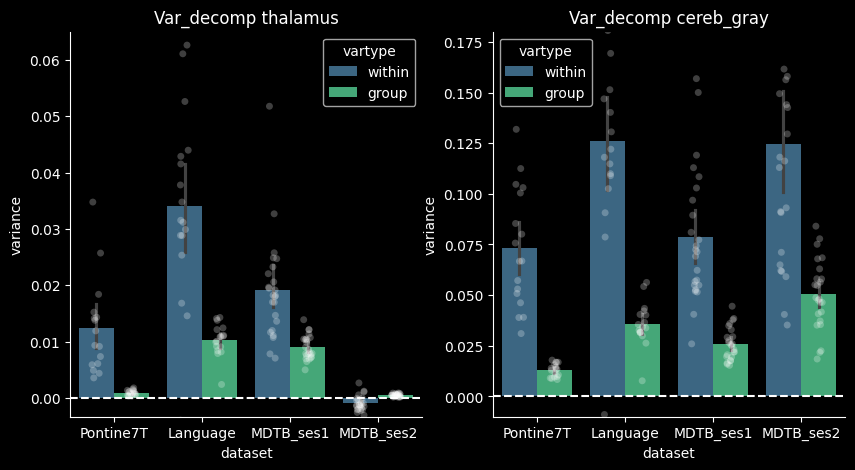

In [36]:
pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymThalamus1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1', 'MDTB_ses2'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language', 'MDTB_ses1', 'MDTB_ses2'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0033,0.065)
ax.set_title("Var_decomp thalamus")

plt.subplot(1,2,2)
X = T[T.atlas=='MNISymCereb2']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1', 'MDTB_ses2'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language', 'MDTB_ses1', 'MDTB_ses2'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
plt.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.01,0.18)
ax.set_title("Var_decomp cereb_gray")


#recall that the height of the bars is the MEAN of the subject group + individual values in the .tsv file


In [34]:
datasets = T['dataset'].unique()
atlases = T['atlas'].unique()
vartypes = ['within', 'group']

# Store results
print("=== One-sample t-tests against zero ===")
for atlas in atlases:
    print(f"\nAtlas: {atlas}")
    for ds in datasets:
        for vt in vartypes:
            # Get data for that combo
            data = T[(T['dataset'] == ds) & (T['vartype'] == vt) & (T['atlas'] == atlas)]['variance'].values
            if len(data) > 0:
                t_stat, p_val = ttest_1samp(data, 0)
                mean = data.mean()
                print(f"{ds} | {vt:6s} | mean = {mean:.4f}, t = {t_stat:.3f}, p = {p_val:.4e}, n = {len(data)}")


=== One-sample t-tests against zero ===

Atlas: MNISymDentate1
Pontine7T | within | mean = 0.0117, t = 6.163, p = 1.8147e-05, n = 16
Pontine7T | group  | mean = 0.0013, t = 6.187, p = 1.7398e-05, n = 16
Language | within | mean = 0.0260, t = 7.189, p = 2.1545e-06, n = 17
Language | group  | mean = 0.0034, t = 8.267, p = 3.6125e-07, n = 17
MDTB | within | mean = -0.0004, t = -1.759, p = 9.1834e-02, n = 24
MDTB | group  | mean = 0.0001, t = 2.664, p = 1.3864e-02, n = 24
MDTB_ses1 | within | mean = 0.0061, t = 9.298, p = 2.9615e-09, n = 24
MDTB_ses1 | group  | mean = 0.0014, t = 9.270, p = 3.1296e-09, n = 24
MDTB_ses2 | within | mean = -0.0010, t = -1.986, p = 5.9061e-02, n = 24
MDTB_ses2 | group  | mean = 0.0001, t = 2.400, p = 2.4881e-02, n = 24

Atlas: MNISymRedNucleus1
Pontine7T | within | mean = 0.0122, t = 4.730, p = 2.6830e-04, n = 16
Pontine7T | group  | mean = 0.0005, t = 2.147, p = 4.8596e-02, n = 16
Language | within | mean = 0.0338, t = 6.372, p = 9.2501e-06, n = 17
Language |

Text(0.5, 1.0, 'Var_decomp rednucleus')

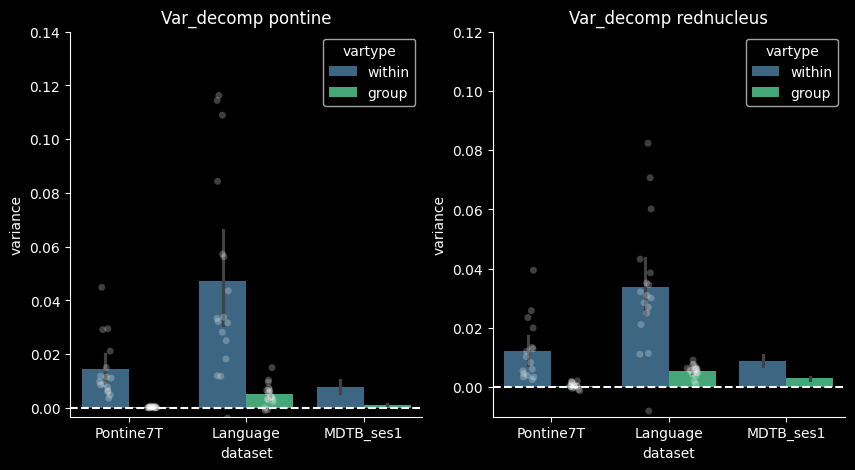

In [169]:
pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymPontine1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0033,0.14)
ax.set_title("Var_decomp pontine")

plt.subplot(1,2,2)
X = T[T.atlas=='MNISymRedNucleus1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
plt.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.01,0.12)
ax.set_title("Var_decomp rednucleus")

Text(0.5, 1.0, 'Var_decomp thalamus')

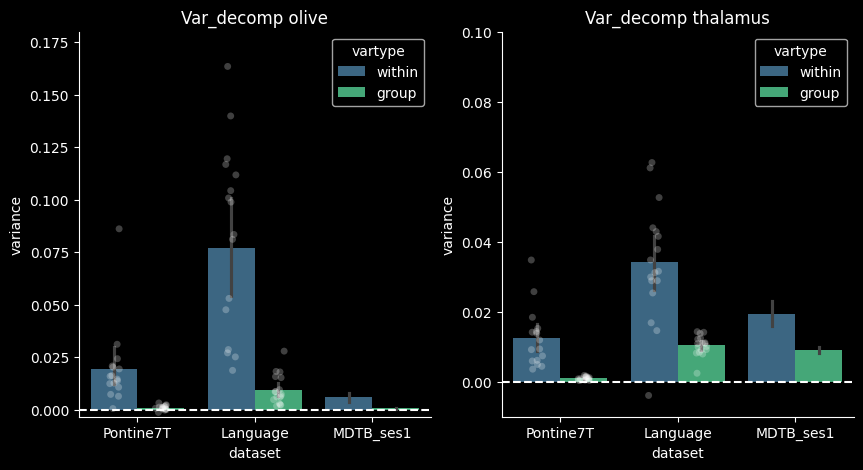

In [168]:
pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymOlive1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0033,0.18)
ax.set_title("Var_decomp olive")

plt.subplot(1,2,2)
X = T[T.atlas=='MNISymThalamus1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
plt.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.01,0.1)
ax.set_title("Var_decomp thalamus")



Text(0.5, 1.0, 'Var_decomp pontine')

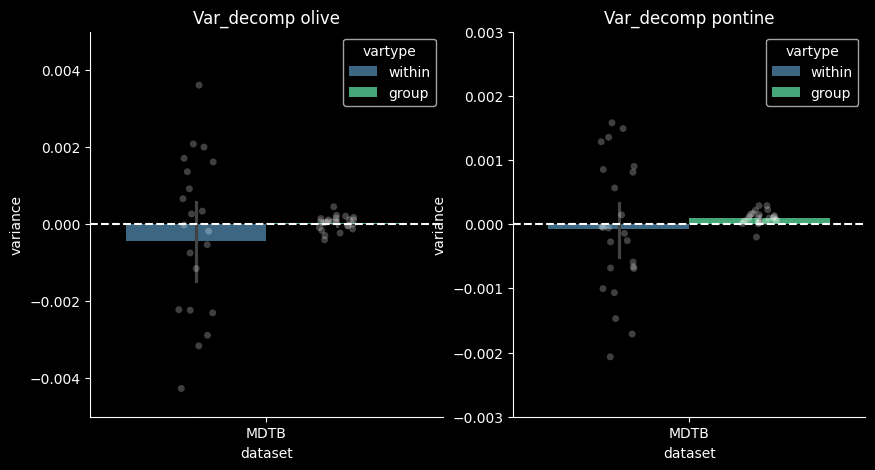

In [30]:

pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymOlive1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
plt.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.005,0.005)
ax.set_title("Var_decomp olive")

plt.subplot(1,2,2)
X = T[T.atlas=='MNISymPontine1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.003,0.003)
ax.set_title("Var_decomp pontine")





Text(0.5, 1.0, 'Var_decomp random data, cerebellar grey')

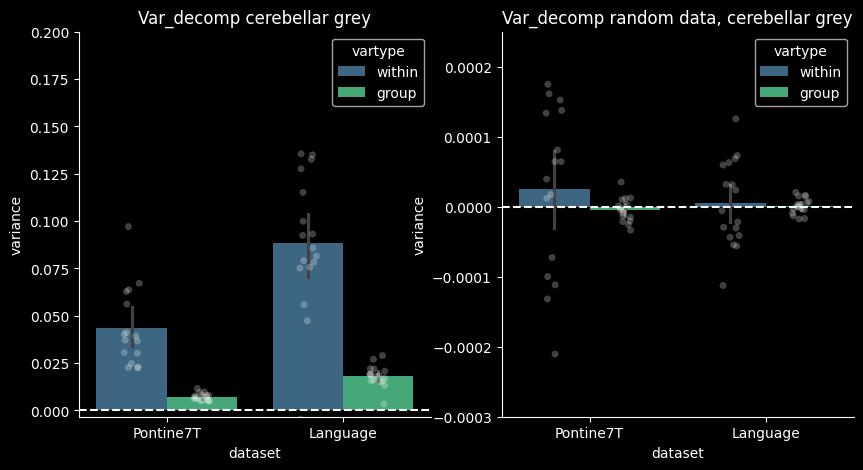

In [118]:
pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymCereb1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0033,0.2)
ax.set_title("Var_decomp cerebellar grey")

plt.subplot(1,2,2)
X = T[T.atlas=='RAND_Cerebellum']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0003,0.00025)
#ax.set_ylim(-0.0033,0.2)
ax.set_title("Var_decomp random data, cerebellar grey")
